In [2]:
import pandas as pd
import numpy as np
import spacy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import keras
# from tensorflow import keras
from keras.saving import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Input, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K

In [3]:
df = pd.read_csv('email_text.csv')

In [4]:
nlp = spacy.load('en_core_web_lg')

In [5]:
docs = []
vectors = []

for doc in nlp.pipe(list(df['text'].astype('unicode').values)):
    docs.append(doc)
    vectors.append(doc.vector)

df['docs'] = docs
df['vectors'] = vectors

In [1]:
df.head()

NameError: name 'df' is not defined

In [6]:
x_train, x_test, y_train, y_test = train_test_split(vectors, df['label'], test_size=0.15, random_state=42)

In [7]:
svc = SVC(kernel='linear')

In [8]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [9]:
y_pred = svc.predict(x_test)

In [10]:
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [11]:
display(f1)

0.9739810161920714

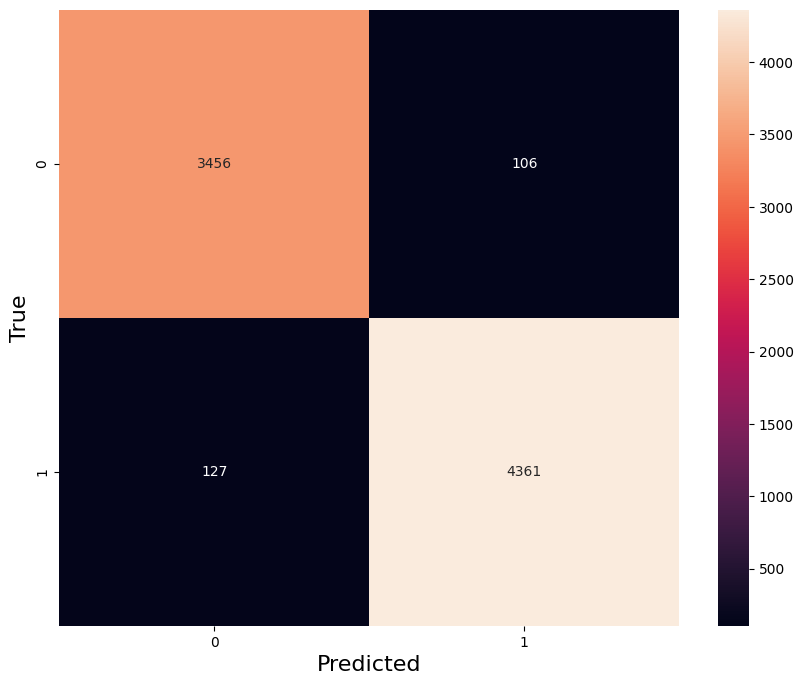

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.gca().set_xlabel("Predicted", fontsize=16)
plt.gca().set_ylabel("True", fontsize = 16)
plt.show()

In [13]:
vector_df = pd.DataFrame(vectors)

In [14]:
vector_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.020407,0.186394,-0.223755,0.074425,0.087116,-0.148284,-0.039051,-0.040254,0.037040,2.280746,...,-0.191366,0.075680,-0.054279,-0.121531,0.100714,0.010305,0.006186,-0.046437,0.050120,0.083462
1,-0.005342,-0.002421,-0.086904,0.037699,0.028351,0.113485,0.072569,-0.258188,0.087588,1.195955,...,-0.077495,0.005488,0.022490,0.028088,0.079588,-0.098093,0.037508,-0.116859,-0.027848,0.146448
2,-0.105363,0.163247,-0.240927,0.022671,0.197806,0.024220,0.144255,-0.200788,0.104131,1.159972,...,-0.024645,-0.073293,-0.105712,-0.186111,0.297109,-0.136390,-0.029520,-0.150299,0.116108,0.224963
3,-0.065160,0.169974,-0.189134,-0.073910,0.068310,0.003586,-0.028931,-0.140860,0.013613,2.234762,...,-0.225698,-0.008102,0.027338,-0.071169,0.093086,-0.047363,-0.054993,-0.042238,0.089142,0.114002
4,-0.026175,0.128144,-0.125736,-0.087098,0.073217,-0.000248,0.012820,-0.067556,-0.002530,2.163235,...,-0.263583,0.004732,0.011923,-0.069353,0.056981,-0.010251,-0.027309,-0.035690,0.039517,0.144970


In [15]:
x_train_dl, x_test_dl, y_train_dl, y_test_dl = train_test_split(vector_df, df['label'], test_size=0.15, random_state=42)

In [16]:
model = Sequential()

In [17]:
model.add(Input((x_train_dl.shape[1],)))
model.add(Dense(x_train_dl.shape[1], activation='relu'))
model.add(Dense(x_train_dl.shape[1] * 2, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_train_dl, y_train_dl, batch_size = 16, epochs = 50, validation_split = 0.1)

Epoch 1/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9435 - loss: 0.1410 - val_accuracy: 0.9816 - val_loss: 0.0601
Epoch 2/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9841 - loss: 0.0516 - val_accuracy: 0.9822 - val_loss: 0.0524
Epoch 3/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9870 - loss: 0.0438 - val_accuracy: 0.9853 - val_loss: 0.0462
Epoch 4/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9896 - loss: 0.0352 - val_accuracy: 0.9803 - val_loss: 0.0680
Epoch 5/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9900 - loss: 0.0337 - val_accuracy: 0.9868 - val_loss: 0.0458
Epoch 6/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9916 - loss: 0.0290 - val_accuracy: 0.9844 - val_loss: 0.0547
Epoch 7/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9882 - val_loss: 0.0444
Epoch 8/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9932 - loss: 0

In [20]:
predictions = model.predict(x_test_dl)
predictions = (predictions[:, 0] > 0.5).astype(np.int8)
print("Accuracy: %", accuracy_score(y_test_dl, predictions) * 100)

correct_preds = (y_test_dl == predictions)
print("That means that out of", y_test_dl.shape[0] ,"test samples, this model got", 
      np.where(correct_preds)[0].size, "correct and",
      np.where(~correct_preds)[0].size, "incorrect")

252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: % 99.2919254658385
That means that out of 8050 test samples, this model got 7993 correct and 57 incorrect


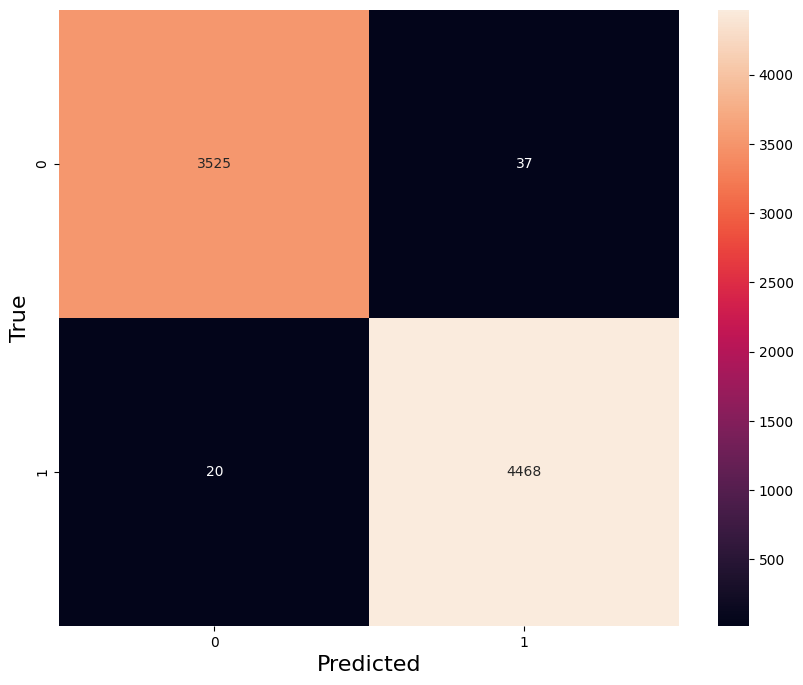

In [22]:
cm_dl = confusion_matrix(y_test_dl, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_dl, annot=True, fmt='g')
plt.gca().set_xlabel("Predicted", fontsize=16)
plt.gca().set_ylabel("True", fontsize = 16)
plt.show()

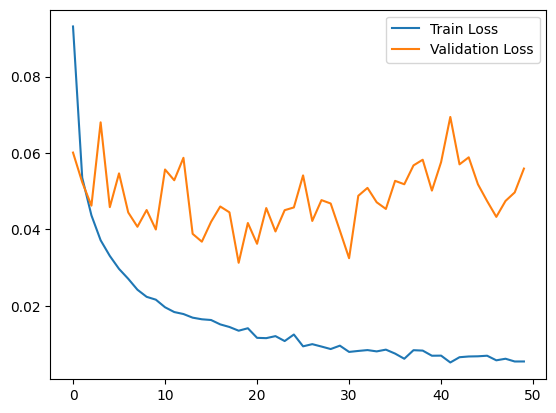

In [23]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

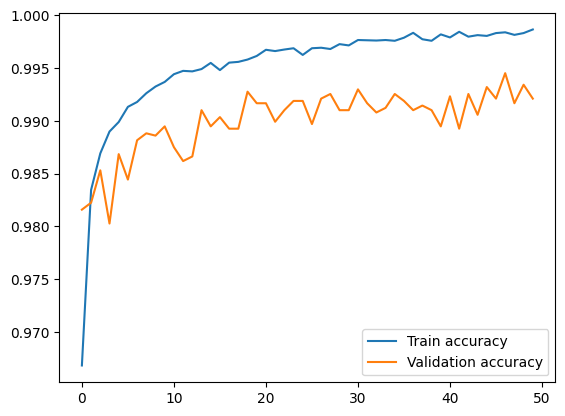

In [24]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [25]:
i = np.random.choice(np.where(~correct_preds)[0])

display(df.iloc[i].text)

print("This mail has label ", y_test_dl.iloc[i])
print()
print("Your model ranked its predictions this way: \n")
print(predictions[i])

"on escapenumber apr escapenumber escapenumber escapenumber escapenumber escapenumber parrot bug summary wrote parrot bug summary http rt perl org rtescapenumber noauth parrot overview html generated at mon apr escapenumber escapenumber escapenumber escapenumber escapenumber gmt numbers overview of open issues numbers ticket counts escapenumber new escapenumber open escapenumber created this week escapenumber closed this week escapenumber overview of open issues platform severity tag lang aix escapenumber abandoned escapenumber escapenumberthreads escapenumber amber escapenumber all escapenumber fatal escapenumber bounce escapenumber basic escapenumber bsdos escapenumber high escapenumber bug escapenumber bc escapenumber cygwin escapenumber low escapenumber compiler escapenumber befunge escapenumber cygwin nt escapenumber medium escapenumber configure escapenumber bf escapenumber darwin escapenumber none escapenumber core escapenumber cola escapenumber dec osf escapenumber normal escap

This mail has label  1

Your model ranked its predictions this way: 

0


In [27]:
display(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 600)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         9,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 841,601 (3.21 MB)

 Trainable params: 280,533 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 561,068 (2.14 MB)

None

In [27]:
model.save(f'{np.int32(accuracy_score(y_test_dl, predictions) * 100000)}.keras')

In [114]:
model2 = Sequential()

In [115]:
model2.add(Input((x_train_dl.shape[1],)))
model2.add(Dense(x_train_dl.shape[1] * 2, activation='relu'))
model2.add(Dense(x_train_dl.shape[1] * 4, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [116]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [117]:
history2 = model2.fit(x_train_dl, y_train_dl, batch_size = 16, epochs = 50, validation_split = 0.1)

Epoch 1/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 126s 49ms/step - accuracy: 0.9465 - loss: 0.1434 - val_accuracy: 0.9794 - val_loss: 0.0656
Epoch 2/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 119s 46ms/step - accuracy: 0.9811 - loss: 0.0544 - val_accuracy: 0.9790 - val_loss: 0.0696
Epoch 3/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 113s 44ms/step - accuracy: 0.9840 - loss: 0.0488 - val_accuracy: 0.9847 - val_loss: 0.0490
Epoch 4/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 119s 46ms/step - accuracy: 0.9884 - loss: 0.0396 - val_accuracy: 0.9847 - val_loss: 0.0492
Epoch 5/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 122s 47ms/step - accuracy: 0.9884 - loss: 0.0365 - val_accuracy: 0.9868 - val_loss: 0.0508
Epoch 6/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 116s 45ms/step - accuracy: 0.9904 - loss: 0.0308 - val_accuracy: 0.9851 - val_loss: 0.0535
Epoch 7/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 118s 46ms/step - accuracy: 0.9910 - loss: 0.0299 - val_accuracy: 0.9901 - val_loss: 0.0453
Epoch 8/50
2566/2566 ━━━━━━━━━━━━━━━━━━━━ 120s 47ms/step - accuracy: 

In [118]:
predictions2 = model2.predict(x_test_dl)
predictions2 = (predictions2[:, 0] > 0.5).astype(np.int8)
print("Accuracy: %", accuracy_score(y_test_dl, predictions2) * 100)

correct_preds2 = (y_test_dl == predictions2)
print("That means that out of", y_test_dl.shape[0] ,"test samples, this model got", 
      np.where(correct_preds2)[0].size, "correct and",
      np.where(~correct_preds2)[0].size, "incorrect")

252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
Accuracy: % 99.21739130434783
That means that out of 8050 test samples, this model got 7987 correct and 63 incorrect


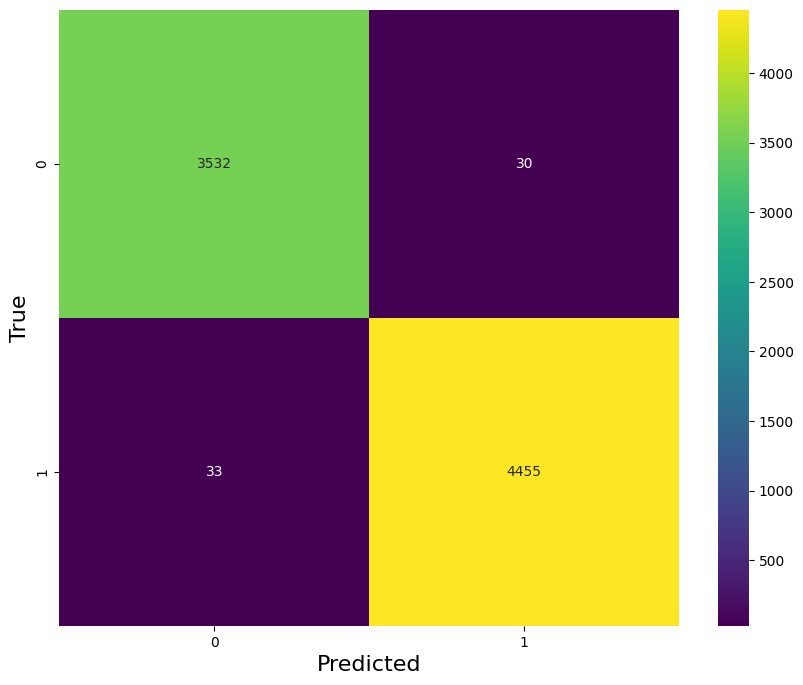

In [119]:
cm_dl2 = confusion_matrix(y_test_dl, predictions2)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_dl2, cmap="viridis", annot=True, fmt='g')
plt.gca().set_xlabel("Predicted", fontsize=16)
plt.gca().set_ylabel("True", fontsize = 16)
plt.show()

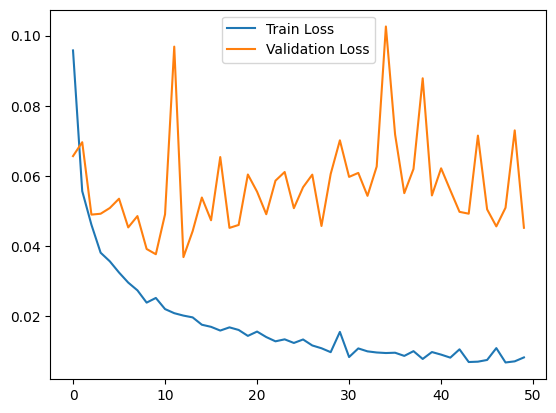

In [120]:
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

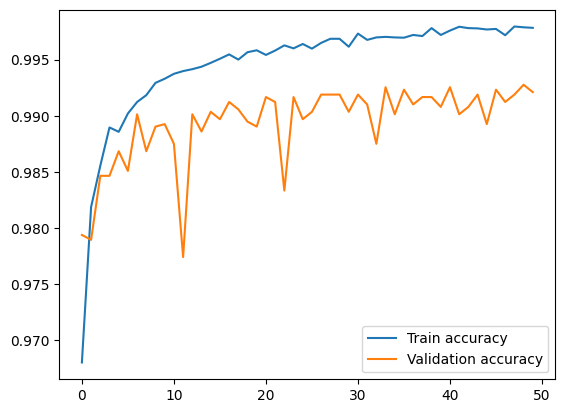

In [121]:
plt.plot(history2.history['accuracy'], label='Train accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [122]:
model2.save(f'{np.int32(accuracy_score(y_test_dl, predictions2) * 10000)}.keras')

In [5]:
loaded_model = load_model('9925.keras')

In [6]:
display(loaded_model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 600)            │       180,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │         9,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 841,601 (3.21 MB)

 Trainable params: 280,533 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 561,068 (2.14 MB)

None

In [28]:
import keras
from tensorflow import keras
from keras.saving import load_model
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_lg')

def preprocess(email : str) -> list:
    vectors = []
    doc = nlp(email)
    vectors.append(doc.vector)
    vector_df = pd.DataFrame(vectors) 
    return vector_df

model = load_model("99254.keras", )

def email_classifier(email : str) -> str:
    data = preprocess(email)
    return 'safe' if model.predict(data) < 0.5 else 'not safe'

In [29]:
my_mail = "Hello, next call will be on friday. Make sure you're not late!"

In [32]:
preprocess(my_mail)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.022679,0.266329,-0.260835,-0.034268,0.186863,-0.067189,0.041367,-0.201233,-0.041453,2.210121,...,-0.152019,0.101052,-0.110113,-0.10047,0.116232,-0.066732,-0.048245,-0.074463,-0.052355,0.129089


In [35]:
model.predict(preprocess(my_mail))[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


np.float32(0.9289962)

In [31]:
x_test_dl

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
10474,0.156814,0.016978,-0.061544,-0.023634,0.097520,0.182195,0.041575,-0.083003,0.031921,0.492850,...,0.053124,0.075066,-0.079182,0.017400,0.000364,-0.092288,-0.018832,-0.051939,-0.106093,0.062014
5158,-0.109280,0.069071,-0.177251,-0.039993,0.089192,-0.026399,0.034539,-0.065776,0.055720,1.987560,...,-0.214946,-0.012903,-0.061507,0.008319,-0.011002,-0.058226,-0.005593,-0.155620,0.049298,0.179529
31756,0.108368,0.030520,-0.002181,-0.018630,0.107112,0.181198,0.082671,0.011141,0.016772,0.288210,...,0.111217,-0.034290,-0.099457,-0.069632,-0.048473,-0.080185,0.037432,-0.046149,-0.092386,0.019827
18427,-0.033445,0.133653,-0.122322,-0.047900,0.055371,-0.056864,0.031077,-0.055423,0.015231,2.070787,...,-0.155917,0.024314,-0.044680,-0.062524,0.046042,-0.034619,-0.049903,-0.024093,0.019830,0.089361
29940,-0.010471,0.156100,-0.151103,-0.032013,-0.003685,0.054399,0.020183,-0.193937,0.019758,1.588741,...,-0.107687,-0.021420,0.006615,-0.042578,0.075979,-0.037696,0.020261,-0.089781,-0.016129,0.140351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24526,0.035486,0.042384,-0.232889,-0.070095,0.062431,0.111817,0.077988,-0.161554,0.061654,1.780824,...,-0.153614,0.028464,0.010114,-0.051620,0.042443,-0.078367,-0.038873,-0.075810,0.029165,0.144542
13734,-0.075624,0.111940,-0.208920,-0.039653,0.007514,0.139429,0.070398,-0.166940,0.019656,1.724558,...,-0.080760,0.035150,0.018141,0.000752,0.131806,-0.096026,-0.039155,-0.055078,0.007931,0.156190
45003,0.018680,0.091736,-0.158657,-0.019549,0.072634,0.067272,0.019631,-0.123689,0.060165,1.911121,...,-0.181800,0.025148,-0.002272,0.012841,0.020529,-0.037189,-0.063283,-0.068316,0.030525,0.107428
39436,-0.012312,0.012927,-0.034341,-0.021895,0.101416,-0.092845,0.006573,-0.092519,0.038026,1.772204,...,-0.084745,-0.013249,-0.018110,-0.071670,0.051604,0.008495,0.012797,-0.057913,0.065750,0.080116


In [30]:
model.predict(x_test_dl)

252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.2829994e-36],
       [1.0000000e+00],
       [1.9891845e-31],
       ...,
       [1.9422612e-04],
       [9.9998635e-01],
       [1.0000000e+00]], dtype=float32)

In [36]:
email_classifier(my_mail)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


'not safe'